Problem Statement: Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or 
previntive measures to stop or control the attrition.

Attrition Def: Attrition is a term used to describe the gradual and natural reduction in the size of a workforce or customer base over time, typically due to voluntary or involuntary departures, such as resignations,  retirements, terminations, or death. It is often used in the context of human resources or customer management, and can have both positive and negative effects on an organization.

In a positive sense, attrition can help an organization to remove low-performing employees, create room for new talent, and save on costs associated with redundant positions. In a negative sense, however, attrition can result in the loss of experienced and valuable employees or customers, and can increase recruitment and training costs.

Attrition is often measured using metrics such as employee turnover rate or customer churn rate, and organizations may develop strategies to minimize attrition and retain their workforce or customer base.

  Attrition Rate = No. of employees left the workforce/Avg.no. of employess



1.Historical Data: (HR_Employee_Attrition_Data.csv) provided by LEARNBAY.

-The dataset contains Employee demographic information(age, gender, occupation, tenure etc).
-Reasons for leaving or discontinuing use (e.g. better job opportunity,  dissatisfaction, retirement, etc)
-Tenure, years at the current role etc.
-Employee saalry and other perks.
-Performance metrics (performance rating/satisfaction, job satisfaction).

2.How to use the information provided in the dataset?

-Identifying the key features to find the reasons and drwaing insights to   undestand the reason for employee turnover by  expolring and analysing the features and patterns.

3.How your analysis and insghts drawn help HR department?
-Targeted interventions to address the specific issues that are driving employees away.
-To improve the onboarding process and ensure that new employees feel supported and engaged from day one.
-Implement interventions to improve employee satisfaction and engagement.
-To provide benifits, oppurtunities for career growth by creating positive  work culture.


Attrition data analysis(EDA) icludes
-Understanding the data.
-Pre-processing the data.
-Exploring the data.
-Transform the data.
-Data Modeling.
-Data Visualization.
-Data Communication.

# Exploratory data analysis(Attrition Dataset)

Import all the modules and the libraries required

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus
import plotly.offline as pyoff
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#import the dataset
df = pd.read_csv('cleaned_dataset_Attrition_imp_features.csv')

In [3]:
df.head(10)

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,Yes,41,Travel_Rarely,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,1,6,4,5
1,No,49,Travel_Frequently,3,2,2,Research Scientist,2,Married,5130,No,1,10,3,10,7,7
2,Yes,37,Travel_Rarely,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,3,0,0,0
3,No,33,Travel_Frequently,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,3,8,7,0
4,No,27,Travel_Rarely,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,3,2,2,2
5,No,32,Travel_Frequently,4,3,1,Laboratory Technician,4,Single,3068,No,0,8,2,7,7,6
6,No,59,Travel_Rarely,3,4,1,Laboratory Technician,1,Married,2670,Yes,3,12,2,1,0,0
7,No,30,Travel_Rarely,4,3,1,Laboratory Technician,3,Divorced,2693,No,1,1,3,1,0,0
8,No,38,Travel_Frequently,4,2,3,Manufacturing Director,3,Single,9526,No,0,10,3,9,7,8
9,No,36,Travel_Rarely,3,3,2,Healthcare Representative,3,Married,5237,No,2,17,2,7,7,7


In [4]:
df.shape

(1470, 17)

In [5]:
df.info() #to check null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                1470 non-null   object
 1   Age                      1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   EnvironmentSatisfaction  1470 non-null   int64 
 4   JobInvolvement           1470 non-null   int64 
 5   JobLevel                 1470 non-null   int64 
 6   JobRole                  1470 non-null   object
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  OverTime                 1470 non-null   object
 11  StockOptionLevel         1470 non-null   int64 
 12  TotalWorkingYears        1470 non-null   int64 
 13  WorkLifeBalance          1470 non-null   int64 
 14  YearsAtCompany           1470 non-null  

In [6]:
df.isnull().values.any() #Checking if any missing values present

False

In [7]:
# del df['Unnamed: 10']

In [8]:
df.isnull().values.sum()

0

In [9]:
df.describe() # 5 Number Summary

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.721769,2.729932,2.063946,2.728571,6502.931293,0.793878,11.279592,2.761224,7.008163,4.229252,4.123129
std,9.135373,1.093082,0.711561,1.106940,1.102846,4707.956783,0.852077,7.780782,0.706476,6.126525,3.623137,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,0.000000,6.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,1.000000,10.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,1.000000,15.000000,3.000000,9.000000,7.000000,7.000000
max,60.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,3.000000,40.000000,4.000000,40.000000,18.000000,17.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


The 'Attrition' feature will be our dependent variable/feature and rest all independent valriables/features

In [11]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [12]:
len(df.select_dtypes(include='object').columns)

5

In [13]:
# numerical columns
df.select_dtypes(include='int64').columns

Index(['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
len(df.select_dtypes(include='int64').columns)

12

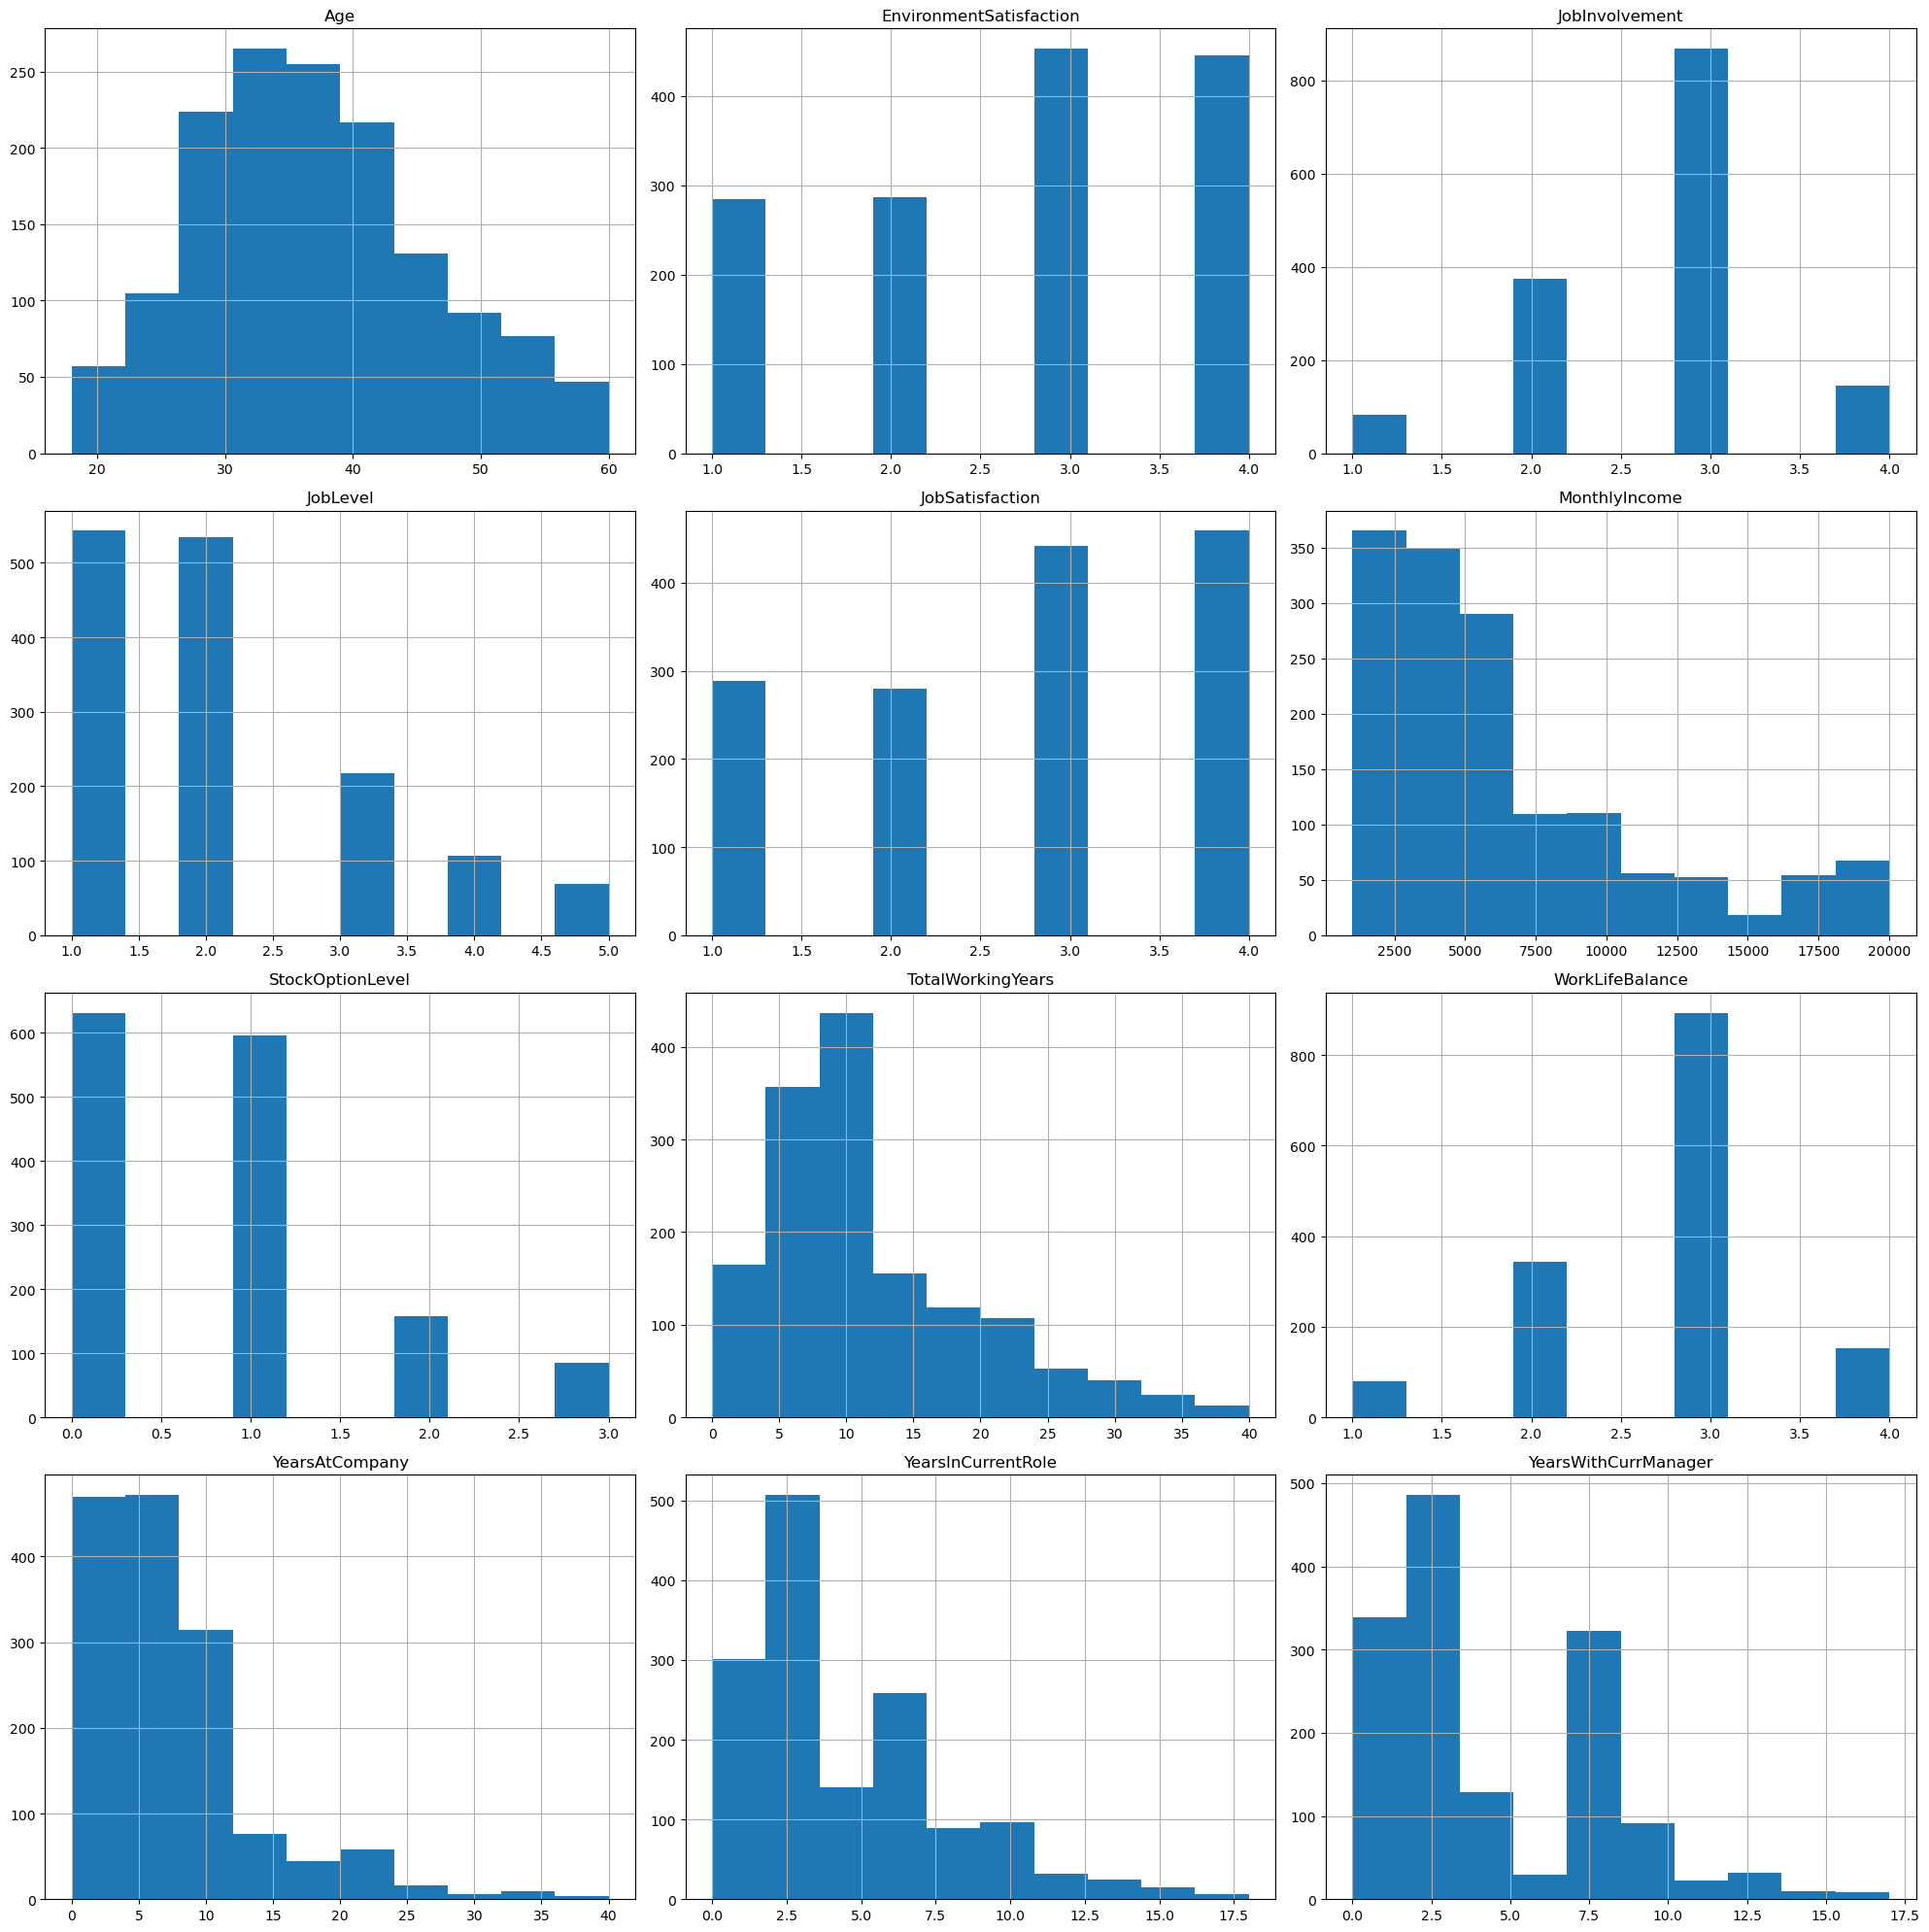

In [15]:
df.hist(figsize =(20,20))
plt.tight_layout()
plt.show()

In [16]:
# df.Age.skew(), df.DistanceFromHome.skew(), df.MonthlyIncome.skew(), df.NumCompaniesWorked.skew(),
# df.PercentSalaryHike.skew(), df.TotalWorkingYears.skew(), df.YearsAtCompany.skew(), df.YearsInCurrentRole.skew()

In [17]:
# df.Age.kurtosis(), df.DistanceFromHome.kurtosis(), df.MonthlyIncome.kurtosis(), df.NumCompaniesWorked.kurtosis(),
# df.PercentSalaryHike.kurtosis(), df.TotalWorkingYears.kurtosis(), df.YearsAtCompany.kurtosis(), df.YearsInCurrentRole.kurtosis()

By seeing the Histograms we cany say that most of the distibutions are right-skewed.
Age feature is not that right skewed. most of the employees are between 25-40 years age group.
Features like EmployeeCount and StandardHours can be ignored as they donot have relevant information useful to us.

In [18]:
# #We can drop columns/features of no important or relavent
# df['EmployeeCount'].nunique()


In [19]:
# df['EmployeeCount'].nunique()


In [20]:
# df['EmployeeNumber'].nunique()

In [21]:
# df['Over18'].nunique()


In [22]:
# df['StandardHours'].nunique()

In [23]:
# df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [24]:
# df.head()

In [25]:
# df.shape #we have dropped 3 features so shape (2940,32)

In [26]:
# df.describe().T


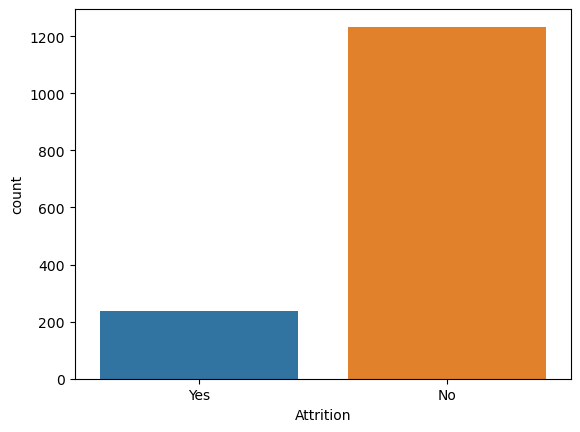

In [27]:
sns.countplot(df['Attrition']) 
plt.show()
#Attrition Count (tells about the employees left and working in the company)

In [28]:
# Employees left the company
(df.Attrition == 'Yes').sum()

237

In [29]:
# Employees with the company
(df.Attrition == 'No').sum()

1233

# Univariate Analysis

In [30]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

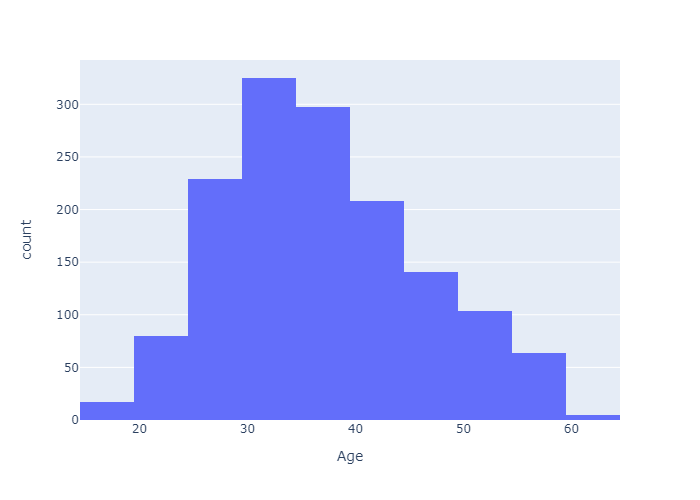

In [31]:
fig = px.histogram(df, x="Age",nbins=(10))
fig.show("png")

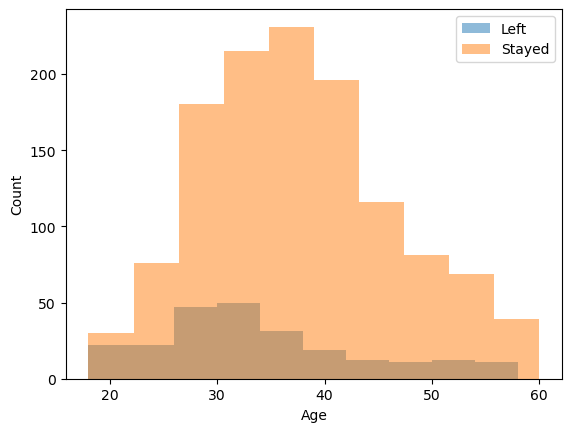

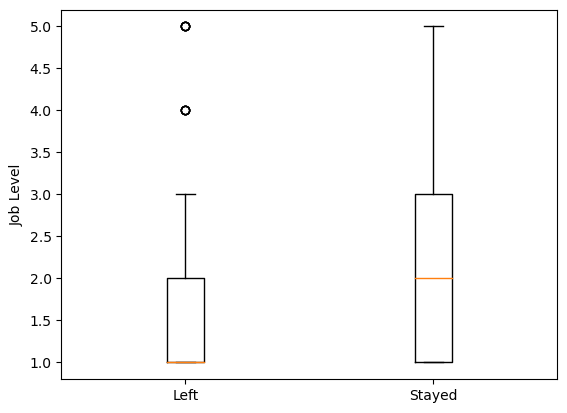

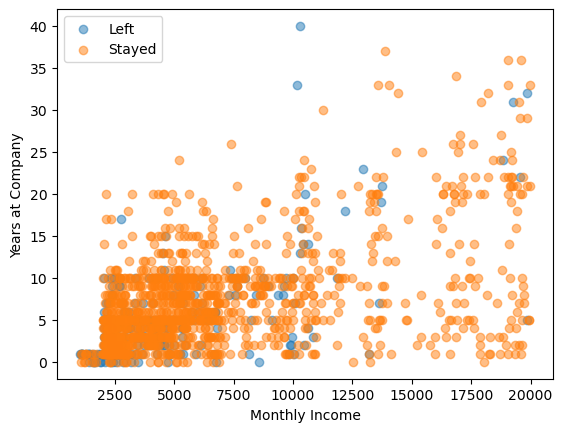

KeyError: 'PerformanceRating'

In [36]:
# create a histogram of employee ages by attrition status
plt.hist(df[df["Attrition"] == "Yes"]["Age"], alpha=0.5, label="Left")
plt.hist(df[df["Attrition"] == "No"]["Age"], alpha=0.5, label="Stayed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# create a boxplot of employee job levels by attrition status
plt.boxplot([df[df["Attrition"] == "Yes"]["JobLevel"],
             df[df["Attrition"] == "No"]["JobLevel"]])
plt.xticks([1, 2], ["Left", "Stayed"])
plt.ylabel("Job Level")
plt.show()

# create a scatterplot of employee salaries by attrition status
plt.scatter(df[df["Attrition"] == "Yes"]["MonthlyIncome"],
           df[df["Attrition"] == "Yes"]["YearsAtCompany"], alpha=0.5, label="Left")
plt.scatter(df[df["Attrition"] == "No"]["MonthlyIncome"],
            df[df["Attrition"] == "No"]["YearsAtCompany"], alpha=0.5, label="Stayed")
plt.xlabel("Monthly Income")
plt.ylabel("Years at Company")
plt.legend()
plt.show()

# create a bar chart of employee performance ratings by attrition status
df.groupby(["Attrition", "PerformanceRating"]).size().unstack().plot(kind="bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()







In [32]:
print('\033[1m' "Findings:")
print(round(len(df.query("Age>=30 and Age<40"))/len(df)*100,2),"% of employees are in the range of 30 to 39 years.")

Findings:
42.31 % of employees are in the range of 30 to 39 years.


In [33]:
# Plot

plot_data = [go.Bar(x = df['Department'].value_counts().sort_index().index, 
                    y = df['Department'].value_counts().sort_index(),)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Total employees per Department')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

NameError: name 'go' is not defined

In [ ]:
rint('\033[1m' "Findings:")
print("R&D is the largest department, with", round(len(df.query("Department=='Research & Development'"))/len(df)*100,2), "% of the total")
Findings:

In [ ]:
fig = px.histogram(data_frame = df, x='JobRole', title="Total employees per JobRole")

fig.show("png")

In [ ]:
JobRole_Att = positive_attrition.groupby(["JobRole"])["Attrition"].count().to_frame()
JobRole_Att['Total'] = df.groupby(["JobRole"])["Attrition"].count()
JobRole_Att['Yes%'] = JobRole_Att['Attrition']/JobRole_Att['Total']*100
JobRole_Att = JobRole_Att.reset_index().sort_values(by='Yes%', ascending=False)
JobRole_Att

In [ ]:
fig = px.bar(data_frame = JobRole_Att, x="JobRole", y="Yes%", title="Attrition per Job role (%)")

fig.show("png")

In [ ]:
# Plot

plot_data = [go.Bar(x = df['Gender'].value_counts().index, 
                    y = df['Gender'].value_counts(),)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Total employees per gender')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

In [ ]:
Gender_Att = positive_attrition.groupby(["Gender"])["Attrition"].count().to_frame()
Gender_Att['Total'] = df.groupby(["Gender"])["Attrition"].count()
Gender_Att['Yes%'] = Gender_Att['Attrition']/Gender_Att['Total']*100
Gender_Att = Gender_Att.reset_index().sort_values(by='Yes%', ascending=False)
Gender_Att

In [ ]:
fig = px.bar(data_frame = Gender_Att, x="Gender", y="Yes%", title="Attrition per Gender (%)")

fig.show("png")

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'], x=df['JobRole'])
plt.grid(True, alpha =1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, figsize=(10, 10))
sns.catplot(x='JobRole', hue ='Attrition', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:

# sns.countplot(x='Department', hue='Attrition', data=df)


In [ ]:

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)

In [ ]:
sns.catplot(x='JobRole', hue ='OverTime', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

In [ ]:
# Categorical columns
df.select_dtypes(include='object').columns

In [ ]:
#converting object datatypes to categorical datatypes.
for column in df.columns:
    if df[column].dtype =='object':
        df[column] = df[column].astype('category')
        df[column] = df[column].astype('category').cat.codes
        

In [ ]:
corr = df.corr()

In [ ]:
corr

In [ ]:
#Map/Matrix showing correlation between features
plt.figure(figsize =(16,10))
ax = sns.heatmap(corr, annot=True, linewidths =1, cmap='coolwarm')

In [ ]:
corr_matrix = df.corr()

# Find highly correlated features
corr_threshold = 0.4
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[corr_matrix.columns[i] + " - " + corr_matrix.columns[j]] = corr_matrix.iloc[i, j]

# Print highly correlated features
for pair, corr in corr_pairs.items():
    print(pair + " : " + str(corr))

In [ ]:
# calculate correlation coefficients
correlations = df.corr()['Attrition'].drop('Attrition')

# print correlation coefficients in descending order
print(correlations.sort_values(ascending=False))

In [ ]:
#Split the dataset for training testing
# features


X = df.drop(columns='Attrition', axis= 1)
# target variable
y = df['Attrition']

# Splitting the dataset in 80:20(80% train data, 20% test data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, type(X_train))

In [ ]:
print(y_train.shape, type(y_train))

In [ ]:
print(y_test.shape, type(y_test))

# Feature Sclaing/Standerdization

In [ ]:
#Standerdization of data/Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train, X_train.shape, type(X_train))

In [ ]:
print(y_train.shape, type(y_train))

In [ ]:
print(X_test,X_test.shape, type(X_test))

In [ ]:
print(y_test.shape, type(y_test))

Our objective is to predict the Attrition and give insights to HR Department to make further strategies to retain the talent and to find the replacement at the earliest.

Predicting Attrition (Target Feature) is a supervised binary classification task ( Either the employee stays or leaves the Company i.e. 1,0). 
There are different type of Supervised Machine Learning Algorithms to classify the features and a predict the future with best accuracy.
1.Decision Tree Classification
2.Random Forest
3.Logistic Regression
4.SVM Algorithm
We will compare accuracy scores for estimated predictions by the above mentioned classification models and predict the Attrition with best accuracy.
we need to train the Model and test the trained model to predict the future followed by Model Evaluation.


# Decision Tree Classification (Building the Model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# # from sklearn.model_selection import GridSearchCV
# # # Define the Decision Tree Classifier
# dt = DecisionTreeClassifier(random_state=42)

# # # Define the parameter grid for hyperparameter tuning
# param_grid = {
#      'criterion': ['gini', 'entropy'],
#      'max_depth':[2,4,3,5,6,7,9,11],
#      'min_samples_split': [2,4,6,8,10],
#      'min_samples_leaf':[1,2,3,4,5]
#      }

# # # Perform grid search with cross-validation using the defined parameter grid
# grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10, n_jobs=2)

# # # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # # Print the best hyperparameters and corresponding accuracy score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Accuracy score: ", grid_search.best_score_)



In [ ]:
for max_d in range(1,21):
    model = DecisionTreeClassifier(max_depth=max_d,random_state=42)
    model.fit(X_train, y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test, y_test))
    print('')

In [ ]:
for max_d in range(1,21):
    model = DecisionTreeClassifier(max_depth=max_d, min_samples_split=2, min_samples_leaf = 2, criterion = "gini",random_state=42)
    model.fit(X_train, y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test, y_test))
    print('')

In [ ]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_split =5, min_samples_leaf = 3, criterion = "gini" )
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing score: ",model_dt_2_score_test)
y_pred_dt = model_dt_2.predict_proba(X_test)[:, 1]

In [ ]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_split =2, min_samples_leaf = 2, criterion = "gini")
model_dt_4.fit(X_train, y_train)
model_dt_4_score_train = model_dt_4.score(X_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(X_test, y_test)
print("Testing score: ",model_dt_4_score_test)


In [ ]:
# Decision tree with depth = 5
model_dt_5 = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split =3, min_samples_leaf = 2, criterion = "gini")
model_dt_5.fit(X_train, y_train)
model_dt_5_score_train = model_dt_5.score(X_train, y_train)
print("Training score: ",model_dt_5_score_train)
model_dt_5_score_test = model_dt_5.score(X_test, y_test)
print("Testing score: ",model_dt_5_score_test)

In [ ]:
# # Decision tree with depth = 6
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split =4, min_samples_leaf =2, criterion = "gini")
model_dt_6.fit(X_train, y_train)
model_dt_6_score_train = model_dt_6.score(X_train, y_train)
print("Training score: ",model_dt_6_score_train)
model_dt_6_score_test = model_dt_6.score(X_test, y_test)
print("Testing score: ",model_dt_6_score_test)

In [ ]:
# Decision tree with depth = 7
model_dt7= DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_split =5, min_samples_leaf =2, criterion = "gini")
model_dt7.fit(X_train, y_train)
model_dt_7_score_train = model_dt7.score(X_train, y_train)
print("Training score: ",model_dt_7_score_train)
model_dt_7_score_test = model_dt7.score(X_test, y_test)
print("Testing score: ",model_dt_7_score_test)

In [ ]:
# # Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split =6, min_samples_leaf = 3, criterion = "gini")
model_dt_8.fit(X_train, y_train)
model_dt_8_score_train = model_dt_8.score(X_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(X_test, y_test)
print("Testing score: ",model_dt_8_score_test)

In [ ]:
# # # Decision tree with depth = 10
model_dt_10 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split =7, min_samples_leaf = 2, criterion = "gini")
model_dt_10.fit(X_train, y_train)
model_dt_10_score_train = model_dt_10.score(X_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(X_test, y_test)
print("Testing score: ",model_dt_10_score_test)

In [ ]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth=4,min_samples_split =2, min_samples_leaf = 1,criterion ="entropy", random_state=42)
model_dt.fit(X_train, y_train)


In [ ]:
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [ ]:
predictions_dt = model_dt.predict(X_test)
predictions_dt

In [ ]:

y_test = y_test.to_numpy() # Convert y_test to numpy array
y_actual_result = np.empty((0, 1))
for i in range(len(predictions_dt)):
    if i < len(y_test) and predictions_dt[i] == 1:
        y_actual_result = np.vstack((y_actual_result, y_test[i].reshape(-1, 1)))


In [ ]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print (confusion_matrix(y_test, predictions_dt))

In [ ]:
accuracy_score(y_test, predictions_dt)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
# calculate ROC AUC and accuracy scores on test set
y_pred_proba =model_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, model_dt.predict(X_test))

In [ ]:

# plot ROC curve and accuracy
fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('True Positive Rate', color=color)
ax1.plot(thresholds, tpr, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 1])
ax2 = ax1.twinx()  # create a second y-axis that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(thresholds, [accuracy_score(y_test, y_pred_proba > t) for t in thresholds], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 1])
plt.title(f'ROC AUC = {roc_auc:.3f}')
plt.show()


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_dt, normalize=False)
plt.show()

In [ ]:
print(classification_report(y_test,predictions_dt))

The report consists of 4 sections: precision, recall, f1-score, and support. Each section corresponds to a class in the target variable, and the results for each class are reported separately.

Precision: Precision is the ratio of true positive observations to the total predicted positive observations. It represents the ability of the model to correctly identify positive observations.
Recall: Recall is the ratio of true positive observations to the total actual positive observations. It represents the ability of the model to correctly identify all positive observations.
F1-score: F1-score is the harmonic mean of precision and recall, which is a better measure than accuracy when dealing with imbalanced classes.
Support: Support is the number of occurrences of each class in the actual target values.
Interpreting the results of classification_report requires a domain-specific understanding of the problem and the classes being predicted. In general, a high precision and recall indicate that the model is performing well, while a low precision and recall indicate that the model may need further improvement.



In [ ]:
# model.feature_importances_

In [ ]:
# pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instantiate the classifier with some hyperparameters
dt = DecisionTreeClassifier(max_depth=4, min_samples_split =2, min_samples_leaf = 1,criterion ="entropy", random_state=42)

# Fit the model on your training data
dt.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(dt);

In [ ]:
def report_model(dt):
    model_preds = dt.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(dt,filled=True,feature_names=X);

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=4, min_samples_split =2, min_samples_leaf = 2,criterion ="entropy", random_state=42)
pruned_tree.fit(X_train,y_train)

In [ ]:
report_model(pruned_tree)